In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/juliazh1307/Parkinson-s-Data/main/parkinsons_disease_data.csv', index_col = 0)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
PatientID,,,,,,,,,,,,,,,,,,,,,
3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [ ]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension',
       'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

In [ ]:
relevant_features = ['UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation']

In [ ]:
ct = make_column_transformer(
    ((StandardScaler(), ['UPDRS', 'MoCA', 'FunctionalAssessment'])),
    (OneHotEncoder(), ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation'])
)

pipeline = make_pipeline(
    ct,
    KNeighborsClassifier()
)

In [ ]:
grid = GridSearchCV(
    pipeline,
    param_grid = {
        'kneighborsclassifier__n_neighbors':range(5,21),
        'kneighborsclassifier__metric':['euclidean', 'manhattan'],
        'kneighborsclassifier__weights':['uniform', 'distance']
    },
    scoring = 'f1_macro',
    cv = 10
)

In [ ]:
grid.fit(df, df['Diagnosis'])

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['UPDRS',
                                                                          'MoCA',
                                                                          'FunctionalAssessment']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['Tremor',
                                                                          'Rigidity',
                                                                          'Bradykinesia',
                                                                          'PosturalInstability',
                                                                          'SpeechProblems',
                                                                          'SleepDisorders',
                                                                          'Constipation'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__metric': ['euclidean',
                                                          'manhattan'],
                         'kneighborsclassifier__n_neighbors': range(5, 21),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='f1_macro')

In [ ]:
estimator = grid.best_estimator_

In [ ]:
estimator['kneighborsclassifier'].weights

'distance'

In [ ]:
estimator['kneighborsclassifier'].metric

'manhattan'

In [ ]:
estimator['kneighborsclassifier'].n_neighbors

19

In [ ]:
best_estimator_k_scores = grid.cv_results_['mean_test_score'][33:64:2]

In [ ]:
#grid.cv_results_['params'][32:64]

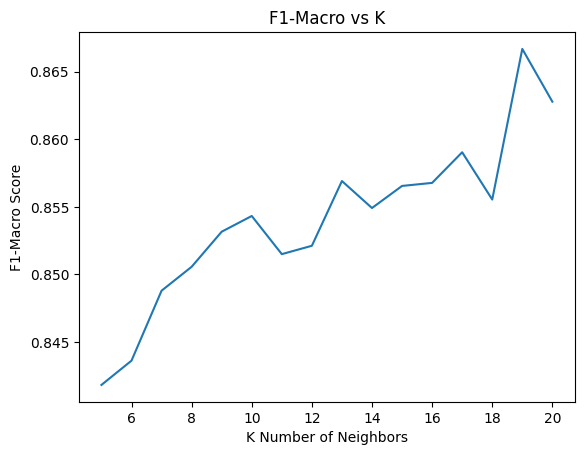

In [ ]:
fig010 = plt.figure()
plt.plot(range(5,21), best_estimator_k_scores)
plt.title('F1-Macro vs K')
plt.xlabel('K Number of Neighbors')
plt.ylabel('F1-Macro Score')
plt.show()

In [ ]:
accuracy_score(df['Diagnosis'], cross_val_predict(estimator, df, df['Diagnosis'], cv = 10))

0.8764845605700713

In [ ]:
f1_score(df['Diagnosis'], cross_val_predict(estimator, df, df['Diagnosis'], cv = 10), average = 'macro')

0.8667482781725255

In [ ]:
ct = make_column_transformer(
    ((StandardScaler(), ['UPDRS', 'MoCA', 'FunctionalAssessment'])),
    (OneHotEncoder(), ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation'])
)

best_model = KNeighborsClassifier(n_neighbors = 19, metric = 'manhattan', weights = 'distance')

pipeline_alternate = make_pipeline(
    ct,
    best_model
)

In [ ]:
numeric = ['UPDRS', 'MoCA', 'FunctionalAssessment']
categorical = ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation']

In [ ]:
f1 = {}
# iterate over all sizes
for size in range(1, len(relevant_features) + 1):
  for features in combinations(relevant_features, size):
    n = []
    c = []
    for f in features:
      if f in numeric:
        n.append(f)
      else:
        c.append(f)
    ct = make_column_transformer((StandardScaler(), n), (OneHotEncoder(), c), remainder = 'drop')
    pipe = make_pipeline(ct, best_model)
    feature_string = ",".join(features)
    f1[feature_string] = cross_val_score(
        pipe,
        X=df[list(features)], y=df['Diagnosis'],
        scoring='f1_macro',
        cv=10).mean()

In [ ]:
f1_sorted = pd.Series(f1).sort_values(ascending = False)
f1_sorted

,0
"UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability",0.889010
"UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems",0.881669
"UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SleepDisorders",0.877396
"UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,Constipation",0.875262
"UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders",0.872608
...,...
"Rigidity,SleepDisorders",0.382516
"PosturalInstability,SleepDisorders,Constipation",0.382516
"Rigidity,Constipation",0.382516
"Bradykinesia,PosturalInstability",0.382516


In [ ]:
ct = make_column_transformer(
    (StandardScaler(), ['UPDRS', 'MoCA', 'FunctionalAssessment']),
    (OneHotEncoder(), ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability']),
    remainder = 'drop'
)

best_pipe = make_pipeline(
    ct,
    KNeighborsClassifier(n_neighbors = 19, metric = 'manhattan')
)

best_pipe.fit(df, df['Diagnosis'])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['UPDRS', 'MoCA',
                                                   'FunctionalAssessment']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Tremor', 'Rigidity',
                                                   'Bradykinesia',
                                                   'PosturalInstability'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=19))])

In [ ]:
f1_score(df['Diagnosis'], cross_val_predict(best_pipe, df, df['Diagnosis'], cv = 10), average = 'macro')

0.8798741098599656

In [ ]:
accuracy_score(df['Diagnosis'], cross_val_predict(best_pipe, df, df['Diagnosis'], cv = 10))

0.8893111638954869

In [ ]:
pd.DataFrame(
    confusion_matrix(df['Diagnosis'], cross_val_predict(best_pipe, df, df['Diagnosis'], cv = 10))
)

,0,1
0,641,160
1,73,1231
